In [1]:
import pickle
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [11]:
N = 4                             # No. of agents
alpha = 0.5
ENS_step = 1000                    # Ensemble
MC_step = 100+1                     # (Macro) Step

T_lst = [2,10,50,200]

In [21]:
S_matrix = []
S_std_matrix=[]
config = 'SH'
for T in T_lst:
    T_mark = [int(T*idx) for idx in np.linspace(0,10,21)]
    with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
        S = pickle.load(f)
    S_lst = [S[t, :, :,2].mean() for t in T_mark]
    S_max = max(S_lst)
    S_min = min(S_lst)
    #print(S_max, S_min)
    S_matrix.append(([(S[t, :, :,2].mean()-S_min)/(S_max-S_min) for t in T_mark]))
    S_std_matrix.append([np.std(S[t, :, :,2])/(ENS_step**0.5)/(S_max-S_min) for t in T_mark])

In [22]:
V_matrix = []
V_std_matrix=[]
config = 'SH'
for T in T_lst:
    T_mark = [int(T*idx) for idx in np.linspace(0,10,21)]
    with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
        V = pickle.load(f)
    V_matrix.append([V[t,:].mean() for t in T_mark])
    V_std_matrix.append([np.std(V[t,:])/(ENS_step**0.5) for t in T_mark])

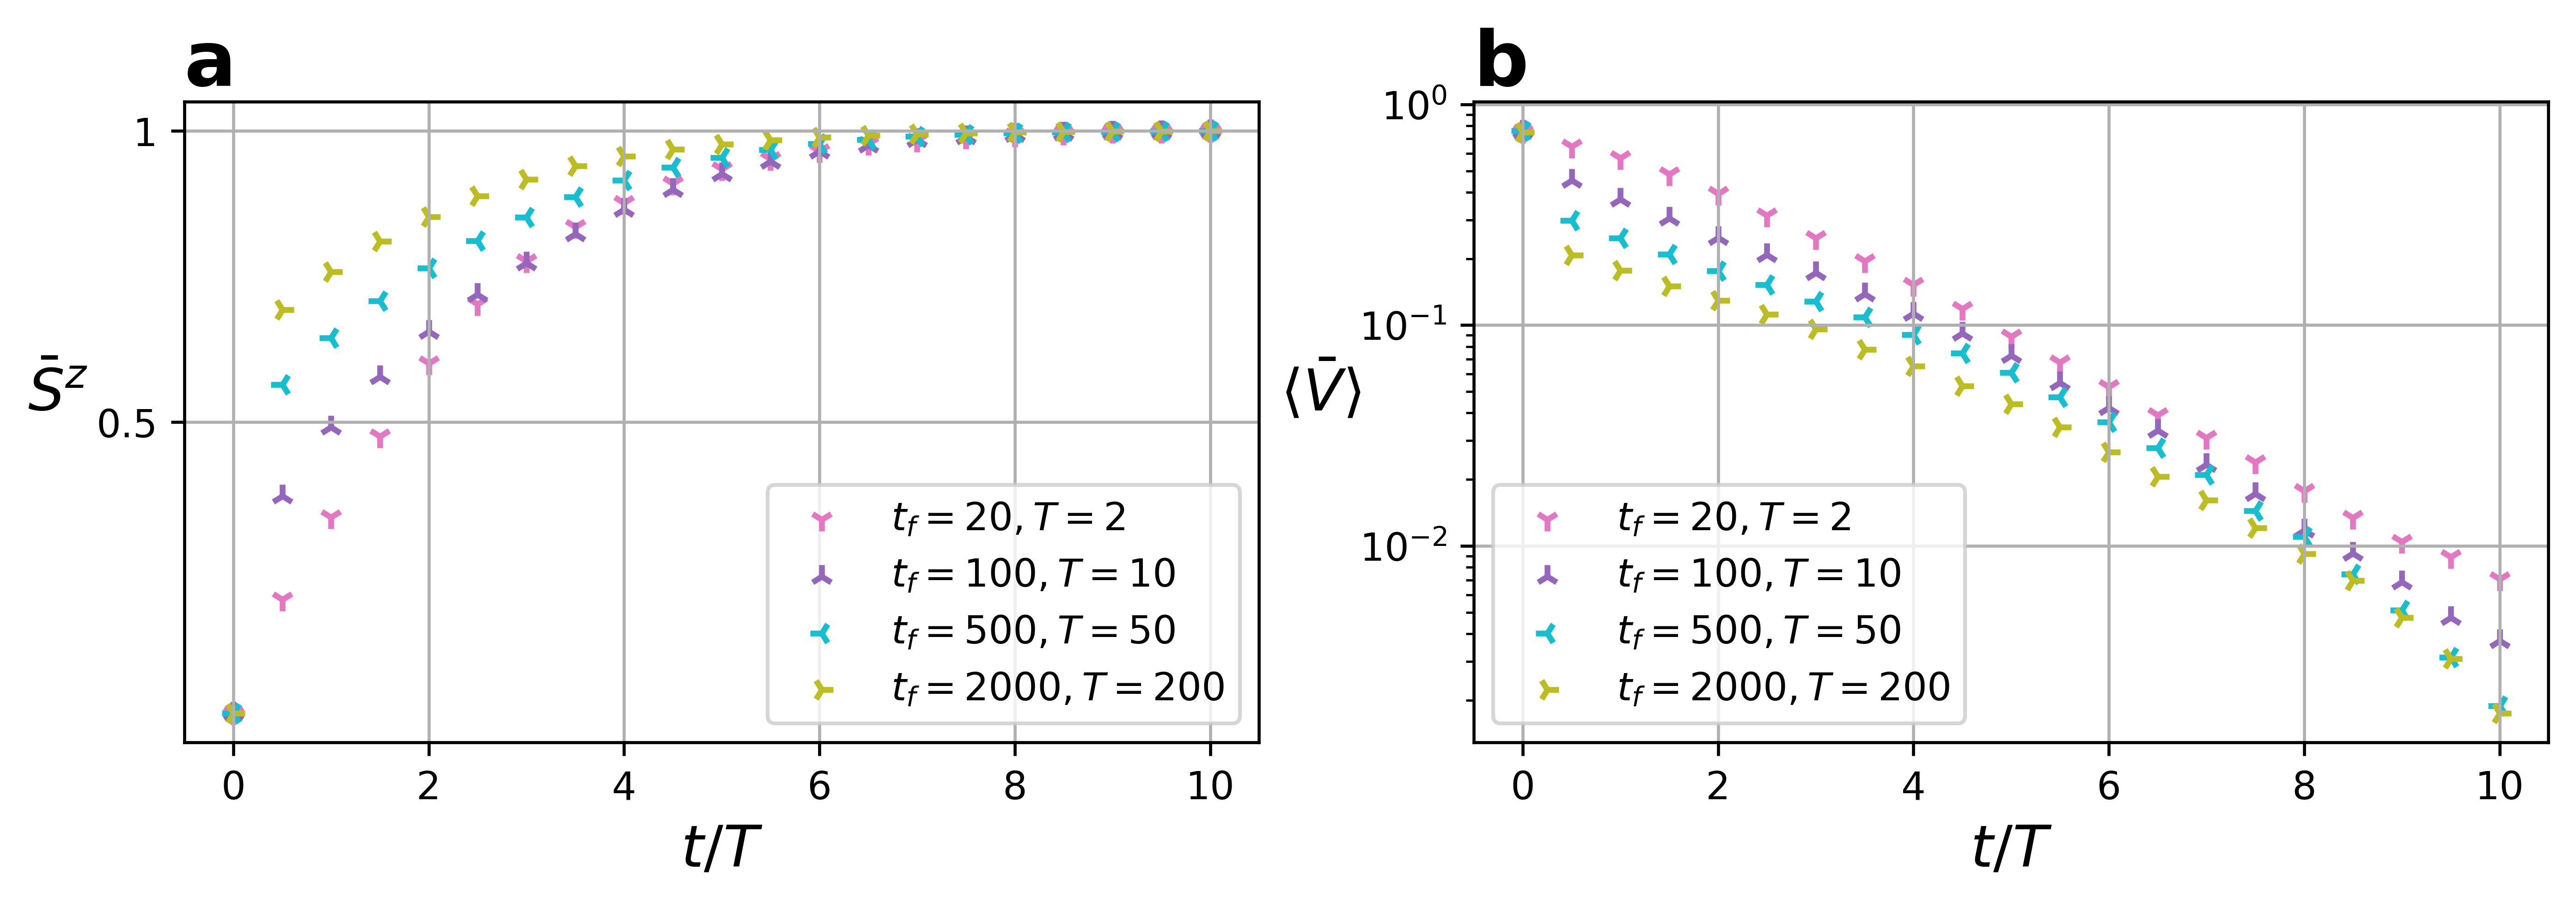

In [25]:
fig,axs = plt.subplots(1,2,figsize=(11,3), dpi=600)
t = np.linspace(0,10,21)

title_font = {
    'fontsize': 20,
    'fontweight': 'bold'
}

# main_fig 2
axs[0].scatter(t, S_matrix[0], marker='1', facecolors='tab:pink', label=r'$t_f=20, T=2$')
axs[0].scatter(t, S_matrix[1], marker='2', facecolors='tab:purple', label=r'$t_f=100, T=10$')
axs[0].scatter(t, S_matrix[2], marker='3', facecolors='tab:cyan', label=r'$t_f=500, T=50$')
axs[0].scatter(t, S_matrix[3], marker='4', facecolors='tab:olive', label=r'$t_f=2000, T=200$')
axs[0].set_xlim([-0.5,10.5])
axs[0].set_yticks([0.5, 1], labels=[0.5,1])
axs[0].set_ylabel(r"${\bar S}^z$", fontsize=15, rotation=0, labelpad=10)
axs[0].set_xlabel(r"$t/T$", fontsize=15)
axs[0].legend()
axs[0].grid()

# main_fig 2
axs[1].scatter(t, V_matrix[0], marker='1', facecolors='tab:pink', label=r'$t_f=20, T=2$')
axs[1].scatter(t, V_matrix[1], marker='2', facecolors='tab:purple', label=r'$t_f=100, T=10$')
axs[1].scatter(t, V_matrix[2], marker='3', facecolors='tab:cyan', label=r'$t_f=500, T=50$')
axs[1].scatter(t, V_matrix[3], marker='4', facecolors='tab:olive', label=r'$t_f=2000, T=200$')

axs[1].set_xlim([-0.5,10.5])
axs[1].set_ylabel(r"$\langle \bar V \rangle$", fontsize=15, rotation=0, labelpad=10)
axs[1].set_xlabel(r"$t/T$", fontsize=15)
axs[1].set_yscale('log')
axs[1].legend(loc='lower left')
axs[1].grid()

axs[0].set_title('a', fontdict=title_font, loc='left', pad=-5)
axs[1].set_title('b', fontdict=title_font, loc='left', pad=-5)

# plt.savefig('Figscale.pdf', bbox_inches = 'tight')